**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 200.


In [2]:
#========================================================
#CALCULATING MILESTONE LIFETIME
#========================================================
total_iteration = w.niters

it = [0.0 for i in range(total_iteration)]
itex = 10 #number of iterations to exclude for harmonic constrained simulation

flux = 0.0
flux_array = []
sink1 = 10.0

it_back = [0.0 for i in range(total_iteration)]
flux_back = 0.0
flux_back_array = []
sink2 = 6.0

lifetime = 0.0
force_eval = 0.0

count_forward = 0
count_backward = 0
for i in range(total_iteration-itex):
    w.iteration = i+1+itex
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    #print sum(wts)
    force_eval += (tau-1)*w.current.walkers*0.2
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink1 and l[j][tau-1] >= sink1:
            it[i] += wts[j]
            #print wts[j], 'forwd'
            count_forward += 1
            for k in range(tau):
                if l[j][k] < sink1 and l[j][k+1] >= sink1:
                    flux += wts[j]
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
                    
        if l[j][0] > sink2 and l[j][tau-1] <= sink2:
            #print l[j,0], l[j,tau-1]
            it_back[i] += wts[j]
            #print wts[j], 'backwd'
            count_backward += 1
            for k in range(tau):
                #print 'elmnts',l[j,k]
                if l[j][k][0] > sink2 and l[j][k+1][0] <= sink2:
                    flux_back += wts[j]
                    #print flux_back, 'fback'
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
    flux_array.append(flux)
    flux_back_array.append(flux_back)
flux = flux/((total_iteration-itex)*(tau-1))
flux_back = flux_back/((total_iteration-itex)*(tau-1))

print "MFPT = ", 1./flux     
print "MFPT_back = ", 1./flux_back
print "lifetime = ", lifetime
print "forward probability = ", sum(it)
print "backward probability = ", sum(it_back)

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability #forward count #backward count"
print >>f1, 1./flux, 1./flux_back, lifetime, sum(it), sum(it_back), count_forward, count_backward
f1.close()

Setting iteration to iter 11.
total simulation time =  20.0 ps
Setting iteration to iter 12.
total simulation time =  80.0 ps
Setting iteration to iter 13.
total simulation time =  140.0 ps
Setting iteration to iter 14.
total simulation time =  200.0 ps
Setting iteration to iter 15.
total simulation time =  270.0 ps
Setting iteration to iter 16.
total simulation time =  350.0 ps
Setting iteration to iter 17.
total simulation time =  430.0 ps
Setting iteration to iter 18.
total simulation time =  500.0 ps
Setting iteration to iter 19.
total simulation time =  590.0 ps
Setting iteration to iter 20.
total simulation time =  680.0 ps
Setting iteration to iter 21.
total simulation time =  770.0 ps
Setting iteration to iter 22.
total simulation time =  870.0 ps
Setting iteration to iter 23.
total simulation time =  970.0 ps
Setting iteration to iter 24.
total simulation time =  1060.0 ps
Setting iteration to iter 25.
total simulation time =  1160.0 ps
Setting iteration to iter 26.
total simu

Setting iteration to iter 137.
total simulation time =  11110.0 ps
Setting iteration to iter 138.
total simulation time =  11200.0 ps
Setting iteration to iter 139.
total simulation time =  11280.0 ps
Setting iteration to iter 140.
total simulation time =  11360.0 ps
Setting iteration to iter 141.
total simulation time =  11430.0 ps
Setting iteration to iter 142.
total simulation time =  11520.0 ps
Setting iteration to iter 143.
total simulation time =  11610.0 ps
Setting iteration to iter 144.
total simulation time =  11700.0 ps
Setting iteration to iter 145.
total simulation time =  11800.0 ps
Setting iteration to iter 146.
total simulation time =  11880.0 ps
Setting iteration to iter 147.
total simulation time =  11970.0 ps
Setting iteration to iter 148.
total simulation time =  12060.0 ps
Setting iteration to iter 149.
total simulation time =  12130.0 ps
Setting iteration to iter 150.
total simulation time =  12220.0 ps
Setting iteration to iter 151.
total simulation time =  12310.

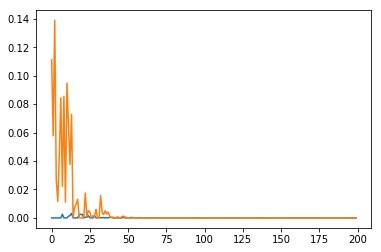

In [3]:
#Forward and backward first passage time distributions
plt.plot(it)
plt.plot(it_back)

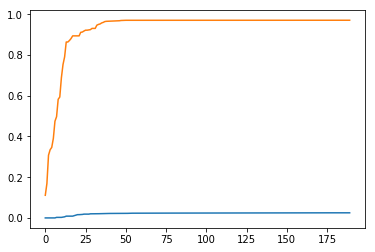

In [4]:
#check for convergence
plt.plot(flux_array)
plt.plot(flux_back_array)
f1 = open('flux.dat','w')
print >>f1, '#time #flux_forward #flux_backward'

for i in range(total_iteration-itex):
    print >>f1, i*(tau-1), flux_array[i], flux_back_array[i]

f1.close()

In [7]:
print it
f1 = open('FPTD_forward.dat','w')

for i in range(itex,len(it)):
    print >>f1, i*(tau-1), it[i]
    
f1.close()


f2 = open('FPTD_back.dat','w')

for i in range(itex,len(it)):
    print >>f2, i*(tau-1), it_back[i]
    
f2.close()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0026337448559670784, 0.0, 0.0, 0.0, 0.0011690534979423867, 0.0016106959304983996, 0.0032473708276177411, 5.1957933241883861e-05, 2.0783173296753545e-05, 0.0, 0.0, 0.0023043519187115787, 0.0024638469956815533, 0.0024933638164913886, 0.0, 0.00054819279378143584, 0.00051888007707581838, 0.0015051075265499841, 2.7409639689071792e-05, 0.0, 0.0, 0.001515678765093397, 0.0, 0.00011568006232112315, 0.00011568006232112315, 0.0002189146572495034, 3.8560020773707715e-05, 0.00025147317447344946, 0.0, 0.00022790358956928332, 0.0, 0.00047682334307990934, 0.00037421027470932873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.7582840163316281e-06, 0.00049685214929101552, 0.0, 0.0, 0.0, 0.0, 0.00040217267839962414, 0.00010648622012275098, 0.00019780715818583909, 0.0, 0.0, 0.00023341186025973559, 0.0, 5.4072417953804137e-07, 3.2443450772282482e-07, 8.9595670078748658e-05, 3.1782680066995117e-05, 0.0, 3.3465374262424409e-05, 1.585941557755895e-05, 4.5207121743617238e-05, 3.171883115